<a href="https://colab.research.google.com/github/Z3Nkkk/Numerical_methods_of_programming/blob/main/lb_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(3.675) = 39.44866
f(3.852) = 47.08718
-------------------


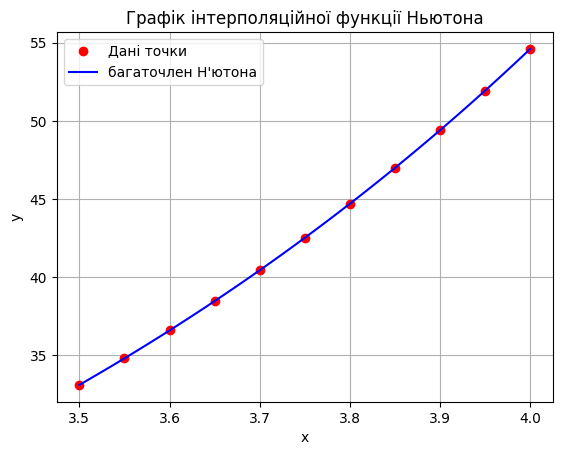

In [17]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

x = np.array ([i * 0.05 + 3.5 for i in range(0, 11)])
y = np.array([33.1154, 34.8133, 36.5982, 38.4747, 40.4473, 42.5211, 44.7012, 46.9931, 49.4024, 51.9354, 54.5982])
x1 = 3.675
x2 = 3.852

def first_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y
  for j in range(1, n):

    for i in range(n - j):
      f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])
  ans = 0

  for j in range(n):
    prod = f[0, j]

    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod
  return ans

def second_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y
  for j in range(1, n):

    for i in range(n - j):
      f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])
  ans = f[0, 0]

  for j in range(1, n):
    prod = f[0, j]

    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod
  return ans

y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {round(y1, 5)}")
print(f"f({x2}) = {round(y2, 5)}")
print("-------------------")


xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
  yy[i] = second_interpolation(x, y, xx[i])

plt.plot(x, y, 'ro', label='Дані точки')
plt.plot(xx, yy, 'b', label="багаточлен Н'ютона")
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()